In [1]:
get_ipython().magic(u'matplotlib inline')
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip

# to show plots:
get_ipython().magic(u'pylab inline')

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")

mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 30
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

Populating the interactive namespace from numpy and matplotlib


In [2]:
from common_plots import *

In [17]:
# Extract dataframes from binary
store = pd.HDFStore("points_I42_scan_NE_extended.h5")
df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly #'relaxed' constraints - +ve g-2 and omegah^2
store.close()

In [18]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_mass
df_pass_all_h1 = subset_mass(df_pass_all, 122.1, 128.1, 'mh1')
df_pass_all_h2 = subset_mass(df_pass_all, 122.1, 128.1, 'mh2')
df_pass_all_strict = df_pass_all[df_pass_all.constraints == ""]

In [19]:
print 'Original points (no constraints):', len(df_orig.index) 
print 'With relaxed constraints (on g-2, relic density & some LHC constraints):', len(df_pass_all.index)
print 'Strictly enforcing all constraints in NMSSMTools 4.6.0:',len(df_pass_all_strict.index)

Original points (no constraints): 5261
With relaxed constraints (on g-2, relic density & some LHC constraints): 236
Strictly enforcing all constraints in NMSSMTools 4.6.0: 0


In [20]:
df_pass_all_h2.T

,3178
mtau,1.777
mh1,115.1933
mh2,124.5653
mh3,1576.9
ma1,80.01763
ma2,1576.185
mhc,1572.657
mstop1,2077.102
mstop2,3056.548
msbottom1,3043.74


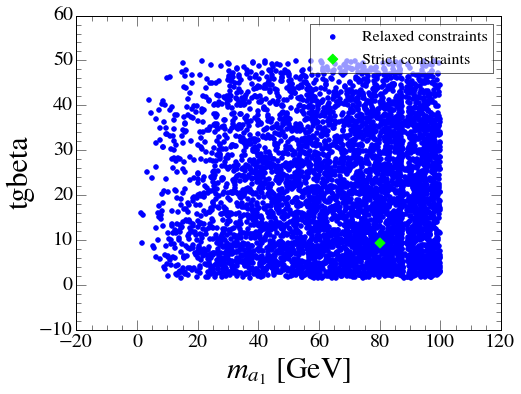

In [24]:
fig = generate_fig()
ax1 = fig.add_subplot(1,2,1)
xvar = 'ma1'
xlabel = r'$m_{a_1}\ \mathrm{[GeV]}$'
yvar = 'tgbeta'
ylabel = yvar
plot_scatter(ax1, xvar=xvar, yvar=yvar, df=df_orig, 
             color='blue', xlabel=xlabel, ylabel=ylabel, 
             label='Relaxed constraints')
plot_scatter(ax1, xvar=xvar, yvar=yvar, df=df_pass_all_h2, 
             color='lime', xlabel=xlabel, ylabel=ylabel, marker='D', s=50,
             label='Strict constraints')
# plot_scatter(ax1, xvar=xvar, yvar=yvar, df=df_ref, 
#              xlabel=xlabel, ylabel=ylabel,
#              label='Benchmark point', color='red', marker="*", s=200, lw=2)

# plt.ylim(bottom=0, top=1)
# plt.xlim(right=12)
plt.legend(fontsize=16, loc=0)
# ax1.set_title(r'$\sigma_{13}(ggh_1)\times BR(h_2\to a_1 a_1)\times BR(a_1\to\tau \tau)^2$')